# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins

import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()

zsh:1: command not found: pip


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/palmerpenguins/penguins.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

features = [
    "island", "sex",
    "bill_length_mm", "bill_depth_mm",
    "flipper_length_mm", "body_mass_g", "year"
]

penguins2 = penguins.dropna(subset=features + ["species"])
X = penguins2[features]
y = penguins2["species"]

cat_cols = ["island", "sex"]
num_cols = [
    "bill_length_mm", "bill_depth_mm",
    "flipper_length_mm", "body_mass_g", "year"
]

preprocess = ColumnTransformer(
    [
        ("cat_ohe",
         OneHotEncoder(handle_unknown="ignore", sparse_output=False),
         cat_cols),
        ("num_scale",
         StandardScaler(),
         num_cols),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=123, stratify=y
)


In [3]:
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score

knn3_pipe = Pipeline(
    [
        ("preprocess", preprocess),
        ("model", KNeighborsClassifier(n_neighbors=3))
    ]
).set_output(transform="pandas")

knn3_pipe.fit(X_train, y_train)

y_pred_knn3 = knn3_pipe.predict(X_test)
probs_knn3 = knn3_pipe.predict_proba(X_test)
classes_knn3 = knn3_pipe.named_steps["model"].classes_

acc_knn3 = accuracy_score(y_test, y_pred_knn3)
prec_knn3, rec_knn3, f1_knn3, _ = precision_recall_fscore_support(
    y_test, y_pred_knn3, labels=classes_knn3
)
auc_knn3 = roc_auc_score(
    y_test, probs_knn3, multi_class="ovr",
    average=None, labels=classes_knn3
)


In [4]:
knn15_pipe = Pipeline(
    [
        ("preprocess", preprocess),
        ("model", KNeighborsClassifier(n_neighbors=15))
    ]
).set_output(transform="pandas")

knn15_pipe.fit(X_train, y_train)

y_pred_knn15 = knn15_pipe.predict(X_test)
probs_knn15 = knn15_pipe.predict_proba(X_test)
classes_knn15 = knn15_pipe.named_steps["model"].classes_

acc_knn15 = accuracy_score(y_test, y_pred_knn15)
prec_knn15, rec_knn15, f1_knn15, _ = precision_recall_fscore_support(
    y_test, y_pred_knn15, labels=classes_knn15
)
auc_knn15 = roc_auc_score(
    y_test, probs_knn15, multi_class="ovr",
    average=None, labels=classes_knn15
)


In [5]:
from sklearn.tree import DecisionTreeClassifier

tree1_pipe = Pipeline(
    [
        ("preprocess", preprocess),
        ("model", DecisionTreeClassifier(
            max_depth=3,
            random_state=123
        ))
    ]
).set_output(transform="pandas")

tree1_pipe.fit(X_train, y_train)

y_pred_tree1 = tree1_pipe.predict(X_test)
probs_tree1 = tree1_pipe.predict_proba(X_test)
classes_tree1 = tree1_pipe.named_steps["model"].classes_

acc_tree1 = accuracy_score(y_test, y_pred_tree1)
prec_tree1, rec_tree1, f1_tree1, _ = precision_recall_fscore_support(
    y_test, y_pred_tree1, labels=classes_tree1
)
auc_tree1 = roc_auc_score(
    y_test, probs_tree1, multi_class="ovr",
    average=None, labels=classes_tree1
)


In [6]:
tree2_pipe = Pipeline(
    [
        ("preprocess", preprocess),
        ("model", DecisionTreeClassifier(
            max_depth=None,
            min_samples_leaf=2,
            random_state=123
        ))
    ]
).set_output(transform="pandas")

tree2_pipe.fit(X_train, y_train)

y_pred_tree2 = tree2_pipe.predict(X_test)
probs_tree2 = tree2_pipe.predict_proba(X_test)
classes_tree2 = tree2_pipe.named_steps["model"].classes_

acc_tree2 = accuracy_score(y_test, y_pred_tree2)
prec_tree2, rec_tree2, f1_tree2, _ = precision_recall_fscore_support(
    y_test, y_pred_tree2, labels=classes_tree2
)
auc_tree2 = roc_auc_score(
    y_test, probs_tree2, multi_class="ovr",
    average=None, labels=classes_tree2
)


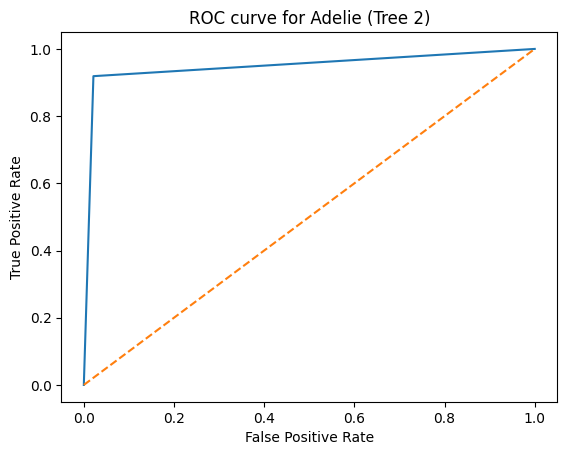

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

species_to_plot = "Adelie"

classes_for_roc = classes_tree2
idx = list(classes_for_roc).index(species_to_plot)

y_binary = (y_test == species_to_plot).astype(int)
fpr, tpr, thresh = roc_curve(y_binary, probs_tree2[:, idx])

plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC curve for {species_to_plot} (Tree 2)")
plt.show()
